# Image Inpainting using GRNN 

## Type of Damages: Text, Scratch, Blockloss, Noise

Inpaint_color: Use for Color images inpainting

image_prep: Use for error images prepareration

grayscale_img: Use for grayscale images inpainting

machine_image: Contain result at the end

In [ ]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt


In [36]:
def psnr_rmse(original, compressed):
    """
    Compute the Peak Signal to Noise Ratio (PSNR) between two images using the Root Mean Square Error (RMSE).

    Parameters:
    - original: The original image.
    - compressed: The compressed or altered image.

    Returns:
    - The PSNR value in decibels (dB).
    """

    # Ensure the images have the same shape
    if original.shape != compressed.shape:
        raise ValueError("The original and compressed images must have the same dimensions.")

    # Initialize variables
    mse = np.mean((original - compressed) ** 2, axis=(0, 1))
    rmse = np.sqrt(mse)

    if np.any(rmse == 0):  # RMSE is zero means no noise is present in the signal.
                           # Therefore PSNR has no meaning.
        return float('inf')

    max_pixel = 255.0

    # For color images, PSNR is calculated for each channel and averaged
    if original.ndim == 3:
        psnr_channels = []
        for i in range(original.shape[2]):
            psnr_channel = 10 * np.log10((max_pixel ** 2) / mse[i])
            psnr_channels.append(psnr_channel)
        psnr = np.mean(psnr_channels)
    else:
        psnr = 10 * np.log10((max_pixel ** 2) / mse)

    return psnr

In [37]:
lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\text\restored_img_txt.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\scratch\restored_img_scratch.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\consecutive block loss\restored_img_blockloss.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_30%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_50%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_70.jpg"]


original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\main_large.jpg"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
for path in lena_path:
    restored_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    psnr = psnr_rmse(original_image, restored_image)
    print(f"PSNR for {path} is {psnr:.2f} dB")

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\text\restored_img_txt.jpg is 39.83 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\scratch\restored_img_scratch.jpg is 41.87 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\consecutive block loss\restored_img_blockloss.jpg is 37.64 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_30%.jpg is 34.44 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_50%.jpg is 31.90 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_70.jpg is 31.99 dB


In [38]:
# Paths to the images
pepper_noise_path = [
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_30%.jpg",
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_50%.jpg",
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_70%.jpg"
]

original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\The-Gray-Scale-Test-Images-a-Lena-b-Cameraman-c-Peppers-and-d-Boat.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the original image is resized to the required size
target_height, target_width = original_image.shape

for path in pepper_noise_path:
    restored_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Resize restored image to match the size of the original image
    restored_image_resized = cv2.resize(restored_image, (target_width, target_height))
    
    psnr = psnr_rmse(original_image, restored_image_resized)
    print(f"PSNR for {path} is {psnr:.2f} dB")

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_30%.jpg is 33.26 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_50%.jpg is 32.19 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\restored_img_70%.jpg is 30.00 dB


In [39]:
lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_30%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_50%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_70%.jpg"]


original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\Mona_Lisa_GS2.jpg"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
for path in lena_path:
    restored_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    psnr = psnr_rmse(original_image, restored_image)
    print(f"PSNR for {path} is {psnr:.2f} dB")

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_30%.jpg is 30.58 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_50%.jpg is 29.85 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\restored_img_70%.jpg is 29.16 dB


## Color

In [40]:
color_lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_color_scratch.jpg",
                   r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_img_txt.jpg",
                   r"C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg"]
original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\Lenna_color.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
for path in color_lena_path:
    restored_image = cv2.imread(path, cv2.IMREAD_COLOR)
    psnr = psnr_rmse(original_image, restored_image)
    print(f"PSNR for {path} is {psnr:.2f} dB")

PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_color_scratch.jpg is 34.54 dB


PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_img_txt.jpg is 34.29 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg is 33.75 dB


## CV2

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_30%.jpg is 34.70 dB


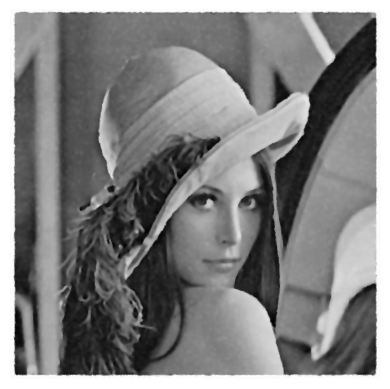

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_50%.jpg is 32.20 dB


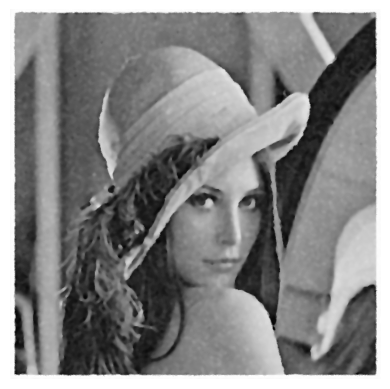

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_70.jpg is 32.17 dB


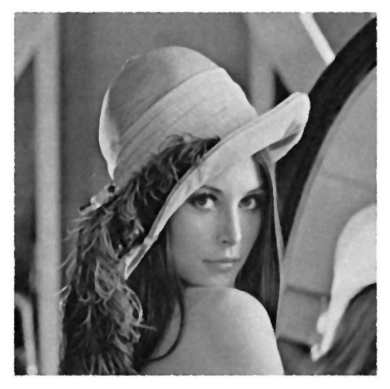

In [41]:

lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\text\damged_imaged_text.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Scratch And Text inpainting\scratch\scratch_img.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\consecutive block loss\main_large_noisy.jpg",]

original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\main_large.jpg"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
i = 0
for path in lena_path:
    dmg_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    _,_,mask = identify_missing_regions(dmg_img)
    inpainted_image_telea = cv2.inpaint(dmg_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    psnr = psnr_rmse(original_image, inpainted_image_telea)
    #print(f"PSNR for {path} is {psnr:.2f} dB")
    cv2.imwrite(f"{i}.jpg",inpainted_image_telea)

def noise_inpainting(damaged_image, mask):
    # Apply median filtering to remove salt and pepper noise
    denoised_image = cv2.medianBlur(damaged_image, 5)  # Adjust the kernel size as needed

    # Inpaint the denoised image
    restored_image = cv2.inpaint(denoised_image, mask, 3, cv2.INPAINT_TELEA)

    return restored_image
lena_path2 = [r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_30%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_50%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Lena\restored_img_70.jpg"]
i = 0
for path in lena_path2:
    dmg_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Create a mask for salt and pepper noise
    mask = np.zeros(dmg_img.shape, dtype=np.uint8)
    mask[np.logical_or(dmg_img == 0, dmg_img == 255)] = 255

    # Apply noise inpainting
    restored_img = noise_inpainting(dmg_img, mask)

    psnr = psnr_rmse(original_image, restored_img)
    print(f"PSNR for {path} is {psnr:.2f} dB")
    cv2.imwrite(f"restored_img_noise_{i}.jpg",restored_img)
    plt.imshow(restored_img, cmap='gray')
    plt.axis('off')
    plt.show()
    i+=1

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_30%.jpg is 34.07 dB


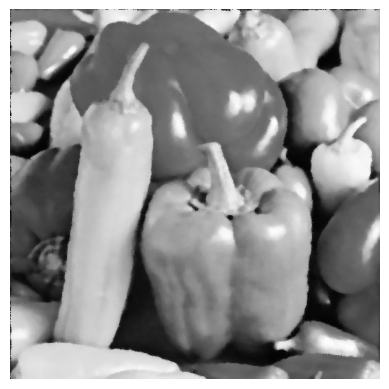

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_50%.jpg is 33.61 dB


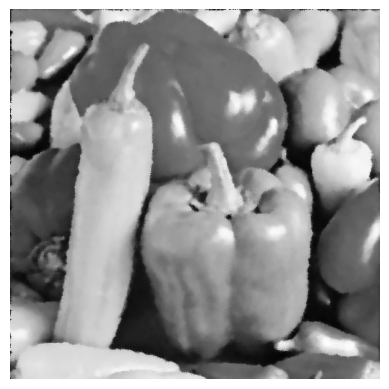

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_70%.jpg is 33.00 dB


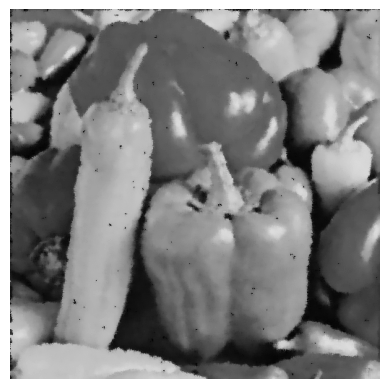

In [42]:

def noise_inpainting(damaged_image, mask):
    # Apply median filtering to remove salt and pepper noise
    denoised_image = cv2.medianBlur(damaged_image, 7)  # Adjust the kernel size as needed

    # Inpaint the denoised image
    restored_image = cv2.inpaint(denoised_image, mask, 3, cv2.INPAINT_TELEA)

    return restored_image
peppers_path = [
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_30%.jpg",
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_50%.jpg",
    r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\Peppers\main_large_noisy_70%.jpg"
]

original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\The-Gray-Scale-Test-Images-a-Lena-b-Cameraman-c-Peppers-and-d-Boat.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
target_height, target_width = original_image.shape

for path in peppers_path:
    dmg_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    dmg_img = cv2.resize(dmg_img, (target_width, target_height))

    # Create a mask for salt and pepper noise
    mask = np.zeros(dmg_img.shape, dtype=np.uint8)
    mask[np.logical_or(dmg_img == 0, dmg_img == 255)] = 255

    # Apply noise inpainting
    restored_img = noise_inpainting(dmg_img, mask)

    psnr = psnr_rmse(original_image, restored_img)
    print(f"PSNR for {path} is {psnr:.2f} dB")
    cv2.imwrite(f"C:\\Users\\VIET HOANG - VTS\\Desktop\\testoutput\\restored_img_noise_{i}.jpg",restored_img)
    plt.imshow(restored_img, cmap='gray')
    plt.axis('off')
    plt.show()



PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_30%.jpg is 34.34 dB


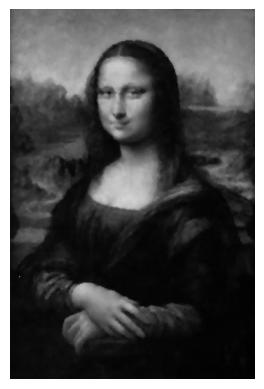

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_50%.jpg is 33.86 dB


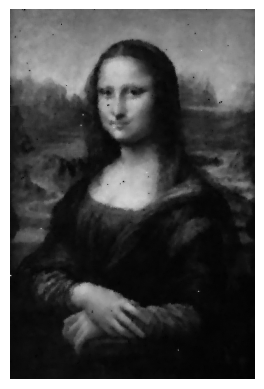

PSNR for C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_70%.jpg is 33.17 dB


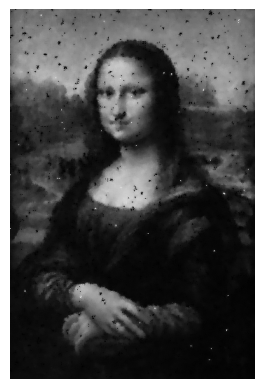

In [43]:

def noise_inpainting(damaged_image, mask):
    # Apply median filtering to remove salt and pepper noise
    denoised_image = cv2.medianBlur(damaged_image, 5)  # Adjust the kernel size as needed

    # Inpaint the denoised image
    restored_image = cv2.inpaint(denoised_image, mask, 3, cv2.INPAINT_TELEA)

    return restored_image

peppers_path = [r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_30%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_50%.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\Noisy inpaint\mona-lisa\main_large_noisy_70%.jpg"]

original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\Mona_Lisa_GS2.jpg"
original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

for path in peppers_path:
    dmg_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # Create a mask for salt and pepper noise
    mask = np.zeros(dmg_img.shape, dtype=np.uint8)
    mask[np.logical_or(dmg_img == 0, dmg_img == 255)] = 255

    # Apply noise inpainting
    restored_img = noise_inpainting(dmg_img, mask)

    psnr = psnr_rmse(original_image, restored_img)
    print(f"PSNR for {path} is {psnr:.2f} dB")

    plt.imshow(restored_img, cmap='gray')
    plt.axis('off')
    plt.show()

In [44]:
color_lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_color_scratch.jpg",
                   r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_img_txt.jpg",
                   r"C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg"]
original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\Lenna_color.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
for path in color_lena_path:
    restored_image = cv2.imread(path, cv2.IMREAD_COLOR)
    psnr = psnr_rmse(original_image, restored_image)
    print(f"PSNR for {path} is {psnr:.2f} dB")

PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_color_scratch.jpg is 34.54 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\restored_img_txt.jpg is 34.29 dB
PSNR for C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg is 33.75 dB


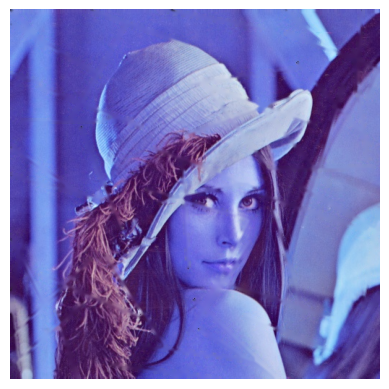

PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\color_scratched_image.jpg is 34.93 dB


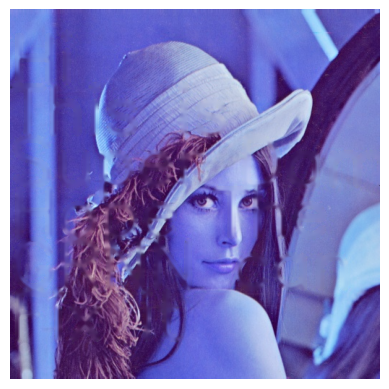

PSNR for C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\color_image_text.jpg is 34.58 dB


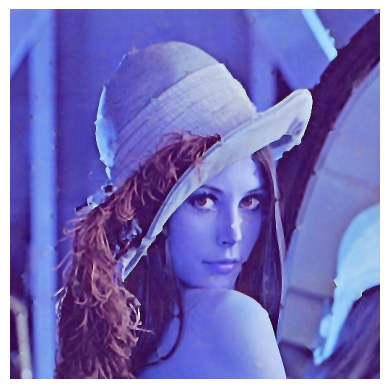

PSNR for C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg is 33.75 dB


In [45]:
lena_path = [r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\color_scratched_image.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\color lena text 10% & scratches 12.29%\color_image_text.jpg",
r"C:\Users\VIET HOANG - VTS\Desktop\color blockloss 8%\restored_img_blockloss.jpg",]
def identify_missing_regions(damaged_image):
    """
    Identify missing regions in the damaged image.

    Parameters:
    damaged_image (np.ndarray): The input damaged image (grayscale or color).

    Returns:
    labeled_image (np.ndarray): Labeled image.
    regions (list): List of region properties.
    binary_image (np.ndarray): Binary image with isolated damaged regions.
    """
    if len(damaged_image.shape) == 3 and damaged_image.shape[2] == 3:
        # Convert the image to grayscale if it is in color
        gray_image = cv2.cvtColor(damaged_image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = damaged_image
    
    # Use a fixed threshold to isolate the damaged region (black line)
    _, binary_image = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY_INV)
    
    # Perform morphological operations to clean up the binary image
    kernel = np.ones((3, 3), np.uint8)
    binary_image = cv2.erode(binary_image, kernel, iterations=1)
    binary_image = cv2.dilate(binary_image, kernel, iterations=2)
    
    # Label connected components
    labeled_image = measure.label(binary_image, connectivity=2)
    regions = measure.regionprops(labeled_image)
    
    return labeled_image, regions, binary_image
original_image_path = r"C:\Users\VIET HOANG - VTS\Desktop\testdata\Lenna_color.png"
original_image = cv2.imread(original_image_path, cv2.IMREAD_COLOR)
i = 0
for path in lena_path:
    dmg_img = cv2.imread(path,cv2.IMREAD_COLOR)
    _,_,mask = identify_missing_regions(dmg_img)
    inpainted_image_telea = cv2.inpaint(dmg_img, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    plt.imshow(inpainted_image_telea)
    plt.axis('off')
    plt.show()
    cv2.imwrite(f'color_{i}.jpg',inpainted_image_telea)
    psnr = psnr_rmse(original_image, inpainted_image_telea)
    print(f"PSNR for {path} is {psnr:.2f} dB")
    i+=1